# Introductory applied machine learning (INFR10069) 

# Lab 3: Support Vector Machine (SVM) Classification and Evaluation

In this lab we initially re-examine the spam filtering problem from Lab 2. This time, we train a Logistic Regression model and a linear Support Vector Machine for the spam or non-spam classification task. In the second part of the lab we examine classification evaluation by using a K-nearest neighbour classifier.


All the datasets that you will need for this lab are located within the `datasets` directory (adjacent to this file).

In [1]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss
from pandas.api.types import CategoricalDtype
KNeighboursClassifier = KNeighborsClassifier # For the Brits!
%matplotlib inline

## 1. Spam filtering

### ========== Question 1.1 ==========
Load `spambase_binary.csv` into a pandas DataFrame structure called `spambase`. Display the number of instances and attributes and the first 5 samples. Remember that the attributes have been binarised. The instances have also been shuffled (i.e. their order has been randomised). 

In [4]:
# Your Code goes here:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'datasets', 'spambase_binary.csv')
spambase = pd.read_csv(data_path, delimiter = ',')
print('Number of samples: {}, number of attributes: {}'.format(spambase.shape[0], spambase.shape[1]))

pd.set_option('display.max_columns', None)
spambase.head(10)

Number of samples: 4601, number of attributes: 55


,word_freq_make_binarized,word_freq_address_binarized,word_freq_all_binarized,word_freq_3d_binarized,word_freq_our_binarized,word_freq_over_binarized,word_freq_remove_binarized,word_freq_internet_binarized,word_freq_order_binarized,word_freq_mail_binarized,word_freq_receive_binarized,word_freq_will_binarized,word_freq_people_binarized,word_freq_report_binarized,word_freq_addresses_binarized,word_freq_free_binarized,word_freq_business_binarized,word_freq_email_binarized,word_freq_you_binarized,word_freq_credit_binarized,word_freq_your_binarized,word_freq_font_binarized,word_freq_000_binarized,word_freq_money_binarized,word_freq_hp_binarized,word_freq_hpl_binarized,word_freq_george_binarized,word_freq_650_binarized,word_freq_lab_binarized,word_freq_labs_binarized,word_freq_telnet_binarized,word_freq_857_binarized,word_freq_data_binarized,word_freq_415_binarized,word_freq_85_binarized,word_freq_technology_binarized,word_freq_1999_binarized,word_freq_parts_binarized,word_freq_pm_binarized,word_freq_direct_binarized,word_freq_cs_binarized,word_freq_meeting_binarized,word_freq_original_binarized,word_freq_project_binarized,word_freq_re_binarized,word_freq_edu_binarized,word_freq_table_binarized,word_freq_conference_binarized,char_freq_;_binarized,char_freq_(_binarized,char_freq_[_binarized,char_freq_!_binarized,char_freq_$_binarized,char_freq_#_binarized,is_spam
0,0,1,0,0,1,0,1,1,0,1,0,1,1,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### ========== Question 1.2 ==========
We are going to use hold-out validation to evaluate our models below. Split the dataset into training and testing subsets using the `train_test_split` [function](http://scikit-learn.org/0.19/modules/generated/sklearn.cross_validation.train_test_split.html) we have used before. Call the resulting matrices `X_train`, `X_test`, `y_train`, `y_test`. Use 90% of the data for training and the remaining 10% for testing. Make sure you don't include the target variable `is_spam` in the input features (`X_train` / `X_test`)!

If you want to be able to reproduce your results exactly, what argument must you remember to set?

In [8]:
# Your Code goes here:

# Extract 1-Hot Encoding into X and add floating-point columns
# delete 'is_spam' column
X = pd.get_dummies(spambase.drop('is_spam', axis=1))
column_names = X.columns
# Convert to Numpy Array
X = X.values
print('X shape: {}'.format(X.shape))

# generate y
y = spambase['is_spam'].values # Target vector
print('y shape: {}'.format(np.shape(y)))

X shape: (4601, 54)
y shape: (4601,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0)

***Your answer goes here:***

train_size test_size random_state

### ========== Question 1.3 ==========
Train a [`LogisticRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier by using training data. Use the `lbfgs` solver and default settings for the other parameters. Report the classification accuracy on both the training and test sets. Does your classifier generalise well on unseen data?

In [12]:
# Your Code goes here:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)

LogisticRegression()

In [16]:
acc_train = lr.score(X_train, y_train)
acc_test = lr.score(X_test, y_test)
print('Classification accuracy on training set: {:.6f}'.format(acc_train))
print('Classification accuracy on testing set: {:.6f}'.format(acc_test))

Classification accuracy on training set: 0.935024
Classification accuracy on testing set: 0.928416


***Your answer goes here:***

yes

### ========== Question 1.4 ==========
Print the coefficients for class 1 for the attributes `word_freq_hp_binarized` and `char_freq_$_binarized`. Generally, we would expect the string `$` to appear in spam, and the string `hp` to appear in non-spam e-mails, as the data was collected from HP Labs. Do the regression coefficients make sense given that class 1 is spam? *Hint: Consider the sigmoid function and how it transforms values into a probability between 0 and 1. Since our attributes are boolean, a positive coefficient can only increase the total sum fed through the sigmoid and thus move the output of the sigmoid towards 1. What can happen if we have continuous, real-valued attributes?*

In [30]:
# Your Code goes here:
for i, j in zip(column_names, lr.coef_[0]):
    if (i == 'word_freq_hp_binarized' or i == 'char_freq_$_binarized'):
        print('Coefficient of ' + i + ': ' + str(j))


Coefficient of word_freq_hp_binarized: -2.639347200187426
Coefficient of char_freq_$_binarized: 1.6986427332527392


***Your answer goes here:***

postive number improves the possibility of spam \
negtive number reduces the possibility of spam

### ========== Question 1.5 ==========
Train a [`LinearSVC`](http://scikit-learn.org/0.19/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) (i.e. Linear Support Vector classifier) by using default parameters. Report the classification accuracy on the training and test sets. 

In [31]:
# Your Code goes here:
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)

LinearSVC()

In [33]:
acc_train_SVM = lsvc.score(X_train, y_train)
acc_test_SVM = lsvc.score(X_test, y_test)
print('Classification accuracy on training set: {:.6f}'.format(acc_train_SVM))
print('Classification accuracy on testing set: {:.6f}'.format(acc_test_SVM))

Classification accuracy on training set: 0.934541
Classification accuracy on testing set: 0.919740


### ========== Question 1.6 ==========
What are the coefficients for the attributes `word_freq_hp_binarized` and `char_freq_`$`_binarized`? Compare these to the ones you found with Logistic Regression.

In [35]:
# Your Code goes here:
for i, j in zip(column_names, lsvc.coef_[0]):
    if (i == 'word_freq_hp_binarized' or i == 'char_freq_$_binarized'):
        print('Coefficient of ' + i + ': ' + str(j))

Coefficient of word_freq_hp_binarized: -0.8567714434870004
Coefficient of char_freq_$_binarized: 0.5693545802298714


***Your answer goes here:***

The absolute value of coefficient in LinearSVC is smaller than Logistic Regression

### ========== Question 1.7 ==========
How does a linear SVM relate to Logistic Regression? *Hint: Consider the classification boundary learnt in each model.*

***Your answer goes here:***

different loss function: SVM(hinge loss)  Logistic Regression(cross entropy loss) \
similarity: supervised classification

### ========== Question 1.8 ==========
By using the [`SVC`](http://scikit-learn.org/0.19/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) class train two new support vector classifiers with Gaussian (`rbf`) and polynomial (`poly`) kernels. Again, report classification accuracies on training and test sets and compare with your results from Question 1.5.

In [39]:
# Your Code goes here:
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)
poly_svc = SVC(kernel='poly')
poly_svc.fit(X_train, y_train)

SVC(kernel='poly')

In [40]:
acc_train_rbf = rbf_svc.score(X_train, y_train)
acc_test_rbf = rbf_svc.score(X_test, y_test)
print('Classification accuracy with Gaussian on training set: {:.6f}'.format(acc_train_rbf))
print('Classification accuracy with Gaussian on testing set: {:.6f}'.format(acc_test_rbf))
acc_train_poly = poly_svc.score(X_train, y_train)
acc_test_poly = poly_svc.score(X_test, y_test)
print('Classification accuracy with Polynomial on training set: {:.6f}'.format(acc_train_poly))
print('Classification accuracy with Polynomial on testing set: {:.6f}'.format(acc_test_poly))

Classification accuracy with Gaussian on training set: 0.959179
Classification accuracy with Gaussian on testing set: 0.934924
Classification accuracy with Polynomial on training set: 0.948551
Classification accuracy with Polynomial on testing set: 0.928416


***Your answer goes here:***

# 2. Performance assessment
We will now look at a few ways of assessing the performance of a classifier. To do so we will introduce a new data set, the [Splice](https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+%28Splice-junction+Gene+Sequences%29) data set. The classification task is to identify `intron` and `exon` boundaries on gene sequences. For more information, you can read the dataset description in the link. The class attribute can take on 3 values: `N`, `IE` and `EI`.

### ========== Question 2.1 ==========
Load the `splice_train.csv` and `splice_test.csv` into two separate dataframes. Display the shape and first 10 instances for each dataframe.

In [43]:
# Load Splice Train Here
# Your Code goes here:
data_path = os.path.join(os.getcwd(), 'datasets', 'splice_train.csv')
splice_train = pd.read_csv(data_path, delimiter = ',')
print('Number of samples: {}, number of attributes: {}'.format(splice_train.shape[0], splice_train.shape[1]))

pd.set_option('display.max_columns', None)
splice_train.head(10)

Number of samples: 2935, number of attributes: 61


,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,pos10,pos11,pos12,pos13,pos14,pos15,pos16,pos17,pos18,pos19,pos20,pos21,pos22,pos23,pos24,pos25,pos26,pos27,pos28,pos29,pos30,pos31,pos32,pos33,pos34,pos35,pos36,pos37,pos38,pos39,pos40,pos41,pos42,pos43,pos44,pos45,pos46,pos47,pos48,pos49,pos50,pos51,pos52,pos53,pos54,pos55,pos56,pos57,pos58,pos59,class
0,T,G,A,T,G,C,C,T,G,C,T,T,G,T,C,C,C,T,G,C,C,C,A,G,A,A,T,T,C,C,C,A,G,C,T,G,C,C,T,G,T,G,T,C,A,G,C,T,T,G,T,C,C,C,C,C,T,G,A,G,N
1,G,C,C,C,A,T,A,T,T,C,T,T,A,T,G,A,A,A,A,T,G,T,G,G,A,C,T,T,T,T,G,G,C,A,A,C,T,T,C,T,G,G,T,G,C,G,A,G,T,T,T,T,G,G,A,C,T,T,C,C,N
2,G,G,C,T,G,C,C,G,G,A,G,C,C,C,C,T,C,A,C,C,C,T,G,A,G,A,T,G,G,G,G,T,A,A,G,G,A,G,G,G,G,G,A,T,G,A,G,G,G,G,T,A,C,T,G,T,G,T,C,T,EI
3,C,T,G,C,T,G,C,T,G,G,T,T,C,T,G,C,T,G,C,C,T,G,G,G,G,C,C,C,A,G,G,T,G,A,G,G,C,A,G,C,A,G,G,A,G,A,A,T,G,G,G,G,G,C,T,G,C,T,G,G,EI
4,T,C,C,C,C,G,A,G,C,C,C,T,C,A,G,C,A,C,A,G,C,A,G,C,T,G,C,G,A,G,A,G,A,T,C,T,T,C,A,A,C,A,T,G,G,C,G,A,G,G,G,A,T,C,A,G,C,G,C,A,N
5,A,T,A,C,C,T,G,C,C,C,G,C,T,G,T,A,G,A,T,G,A,G,A,A,A,C,T,C,A,G,G,T,A,G,C,A,C,C,T,G,C,C,C,C,T,G,G,A,G,A,A,A,T,G,G,G,G,T,C,T,EI
6,T,T,C,T,C,C,A,T,T,T,C,T,T,T,C,T,T,G,G,G,G,T,C,T,C,T,G,C,A,G,G,T,A,C,G,A,G,C,G,A,A,A,C,A,T,T,G,A,A,A,A,G,A,T,A,T,C,C,A,T,IE
7,A,A,A,G,A,T,G,A,T,A,A,G,C,C,C,A,C,T,C,T,A,C,A,G,C,T,G,G,A,G,G,T,A,A,G,T,G,A,A,T,G,C,T,A,T,G,G,A,A,T,G,A,A,G,C,C,C,T,T,C,EI
8,C,C,A,A,T,C,C,C,A,G,A,C,G,C,T,A,T,G,T,C,C,A,G,C,A,A,A,G,G,C,T,C,C,G,T,G,G,T,T,C,T,G,G,C,C,T,A,C,A,G,T,G,G,C,G,G,C,C,T,G,N
9,G,C,C,G,T,G,G,T,T,T,T,T,T,T,G,C,T,T,C,A,C,C,A,C,C,C,T,G,A,G,G,T,G,C,G,T,C,C,T,G,G,G,G,A,C,A,A,G,C,A,A,A,A,G,G,C,T,C,C,T,EI


In [44]:
# Load Splice Test Here
# Your Code goes here:
data_path = os.path.join(os.getcwd(), 'datasets', 'splice_test.csv')
splice_test = pd.read_csv(data_path, delimiter = ',')
print('Number of samples: {}, number of attributes: {}'.format(splice_test.shape[0], splice_test.shape[1]))

pd.set_option('display.max_columns', None)
splice_test.head(10)

Number of samples: 255, number of attributes: 61


,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,pos10,pos11,pos12,pos13,pos14,pos15,pos16,pos17,pos18,pos19,pos20,pos21,pos22,pos23,pos24,pos25,pos26,pos27,pos28,pos29,pos30,pos31,pos32,pos33,pos34,pos35,pos36,pos37,pos38,pos39,pos40,pos41,pos42,pos43,pos44,pos45,pos46,pos47,pos48,pos49,pos50,pos51,pos52,pos53,pos54,pos55,pos56,pos57,pos58,pos59,class
0,C,C,C,T,C,C,C,A,C,T,C,G,T,T,G,C,T,C,T,C,C,G,G,C,C,A,G,C,A,G,C,T,T,G,A,G,C,C,T,G,A,T,C,G,A,G,T,G,C,G,G,C,C,C,A,G,T,G,C,A,IE
1,C,A,C,T,G,A,G,T,T,G,A,T,T,T,T,A,G,C,A,G,A,G,A,A,A,C,G,T,G,G,T,G,A,C,C,T,G,A,C,A,A,G,A,G,A,G,A,A,T,G,T,G,A,A,C,C,A,G,T,G,N
2,C,A,G,A,C,T,G,G,G,T,G,G,A,C,A,A,C,A,A,A,A,C,C,T,T,C,A,G,C,G,G,T,A,A,G,A,G,A,G,G,G,C,C,A,A,G,C,T,C,A,G,A,G,A,C,C,A,C,A,G,EI
3,A,G,T,G,A,T,T,G,A,C,T,T,T,A,A,C,T,G,C,A,C,C,A,C,A,A,G,T,T,C,T,G,T,C,T,C,T,T,C,A,G,C,A,C,T,G,G,C,C,A,A,T,A,C,C,A,A,A,G,A,N
4,G,T,A,G,A,C,A,C,C,T,A,A,G,A,C,C,T,T,T,T,T,T,T,C,T,T,T,T,A,G,G,T,G,T,C,T,G,C,A,T,T,A,T,T,G,G,G,C,C,G,A,A,T,C,C,C,T,T,C,T,IE
5,C,T,T,G,T,T,A,C,A,G,G,G,G,T,G,C,T,G,G,C,C,T,T,C,C,C,T,G,G,C,G,C,C,T,G,C,C,C,C,T,G,T,C,G,G,C,C,C,C,G,C,C,C,G,A,G,A,A,C,C,N
6,C,G,T,C,A,A,T,C,A,A,G,T,C,T,A,C,A,C,T,G,T,T,C,A,A,A,T,A,A,G,G,T,A,A,G,C,T,G,G,G,T,A,C,A,G,A,A,A,A,A,G,A,A,A,A,T,T,A,A,G,EI
7,G,T,C,C,G,T,G,C,C,T,T,C,A,G,A,G,C,A,G,T,G,T,C,T,A,G,G,A,G,G,T,G,G,A,G,T,G,G,C,C,A,G,C,T,T,G,G,A,G,T,G,G,C,C,C,T,T,T,G,C,N
8,A,T,A,C,C,T,G,T,A,G,T,G,T,T,C,A,T,T,G,G,C,A,T,T,G,A,G,T,T,G,T,T,G,A,C,T,C,T,T,T,G,G,C,C,A,A,T,A,T,G,G,C,G,T,T,T,A,T,A,T,N
9,G,G,T,G,G,G,C,C,A,A,G,C,A,A,G,G,C,T,G,T,G,C,A,C,A,T,T,T,T,G,T,C,T,G,C,T,C,C,T,C,G,G,C,G,G,G,C,A,A,C,G,C,A,G,G,C,A,T,G,G,N


### ========== Question 2.2 ========== 
Convert the categorical attributes into numeric ones by using the [`get_dummies(...)`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.get_dummies.html) function from pandas. Make sure to take care of the values `D`, `N`, `S`, `R` (see the [documentation](https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+%28Splice-junction+Gene+Sequences%29) for the data). *Hint: checkout the pandas [`CategoricalDtype`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html#pandas.api.types.CategoricalDtype)*. Also, make sure to not transform the target variable (`class`).

In [60]:
# Your Code goes here:
cType = CategoricalDtype(categories=['A','T','C','G'], ordered=True)
X_train = pd.get_dummies(splice_train.drop('class', axis=1).astype(cType))
y_train = splice_train['class']
X_test = pd.get_dummies(splice_test.drop('class', axis=1).astype(cType))
y_test = splice_test['class']

### ========== Question 2.3 ==========
Store the training and testing data into numpy arrays `X_train`, `y_train`, `X_test` and `y_test`. Display the shapes of the four arrays.

In [61]:
# Your Code goes here:
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (2935, 240)
y_train shape: (2935,)
X_test shape: (255, 240)
y_test shape: (255,)


### ========== Question 2.4 ==========
Familiarise yourself with [Nearest Neighbours Classification](http://scikit-learn.org/0.19/modules/neighbors.html#classification). Use a [`KNeighborsClassifier`](http://scikit-learn.org/0.19/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
by using a single neighbour. Report the classification accuracy on the training set.

In [63]:
# Your Code goes here:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [65]:
acc_train_knn = knn.score(X_train, y_train)
acc_test_knn = knn.score(X_test, y_test)
print('Classification accuracy on training set: {:.6f}'.format(acc_train_knn))
print('Classification accuracy on testing set: {:.6f}'.format(acc_test_knn))

Classification accuracy on training set: 0.999659
Classification accuracy on testing set: 0.709804


### ========== Question 2.5 ==========
Is the above result meaningful? Why is testing on the training data a particularly bad idea for a 1-nearest neighbour classifier? Do you expect the performance of the classifier on a test set to be as good?

***Your answer goes here:***

It can be influenced by outliers

### ========== Question 2.6 ==========
Now report the classification accuracy on the test set and check your expectations.

In [66]:
# Your Code goes here:
acc_train_knn = knn.score(X_train, y_train)
acc_test_knn = knn.score(X_test, y_test)
print('Classification accuracy on training set: {:.6f}'.format(acc_train_knn))
print('Classification accuracy on testing set: {:.6f}'.format(acc_test_knn))

Classification accuracy on training set: 0.999659
Classification accuracy on testing set: 0.709804


### ========== Question 2.7 ==========
Plot a histogram of the target variable (i.e. `class`) in the test set. *Hint: matplotlib won't allow you to plot a histogram for categorical values. Instead, you can use Pandas' built-in bar plot tool in conjunction with the [`value_counts`](http://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Series.value_counts.html).* 

In [67]:
# Your Code goes here:
y_test.value_counts()

N     149
IE     54
EI     52
Name: class, dtype: int64

### ========== Question 2.8 ==========
What would be the accuracy of the classifier, if all points were labelled as `N`? 

**Pro Tip** - You should always use a ['Dummy Model'](http://scikit-learn.org/0.19/modules/model_evaluation.html#dummy-estimators) (a ridiculously simple model) like this to compare with your 'real' models. It's very common for complex models to be outperformed by a simple model, such as predicting the most common class. When complex models are outperformed by 'Dummies', you should investigate why: often there was an issue with the code, the data, or the way the model works was misunderstood.

In [71]:
# Your Code goes here:
from sklearn.dummy import DummyClassifier

print(knn.score(X_test, y_test))
knn_dummy = DummyClassifier(strategy='most_frequent', random_state=0)
knn_dummy.fit(X_train, y_train)
print(knn_dummy.score(X_test, y_test))

0.7098039215686275
0.5843137254901961


### ========== Question 2.9 ==========
Now we want to explore the effect of the `k` parameter. To do this, train the classifier multiple times, each time setting the KNN option to a different value. Try `5`, `10`, `50`, `100`, `200`, `500`, `1000`, `1500` and `2000` and test the classifier on the test set. How does the k parameter effect the results? *Hint: Consider how well the classifier is generalising to previously unseen data, and how it compares to the dumb prediction accuracy.*

In [82]:
# Your Code goes here:
num = [5, 10, 50, 100, 200, 500, 1000, 1500, 2000]
acc = []

for i in range(len(num)):
    knn = KNeighborsClassifier(n_neighbors=num[i])
    knn.fit(X_train, y_train)
    acc_knn = knn.score(X_test, y_test)
    acc.extend([acc_knn])

acc

[0.7529411764705882,
 0.8,
 0.8705882352941177,
 0.8823529411764706,
 0.9098039215686274,
 0.9529411764705882,
 0.9607843137254902,
 0.6980392156862745,
 0.5843137254901961]

***Your answer goes here:***

### ========== Question 2.10 ==========
Plot the results (k-value on the x-axis and classification accuracy on the y-axis), making sure to mark the axes. Can you conclude anything from observing the plot?

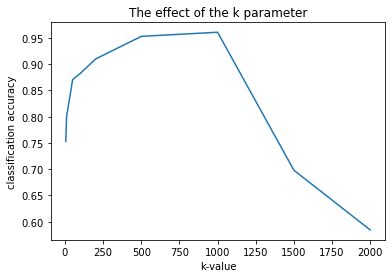

In [81]:
# Your Code goes here:
plt.plot(num, acc)
plt.title('The effect of the k parameter')
plt.xlabel('k-value')
plt.ylabel('classification accuracy')

plt.show()

***Your answer goes here:***

### ========== Question 2.11 ==========
Select best value for `k` from Questions 2.9 and 2.10 and plot the normalised confusion matrix on the test set (you may use the provided function). Then plot the confusion matrix for a 5-nearest neighbour classifier. What do you observe?

In [84]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

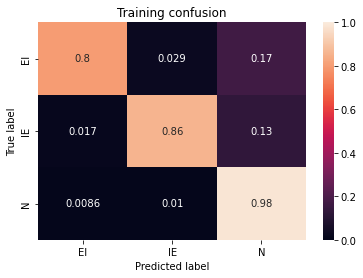

In [86]:
# Your Code goes here:
knn1000 = KNeighborsClassifier(n_neighbors=1000)
knn1000.fit(X_train, y_train)
prediction1000_train = knn1000.predict(X=X_train)

cm = confusion_matrix(y_train, prediction1000_train)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=knn1000.classes_, title='Training confusion')

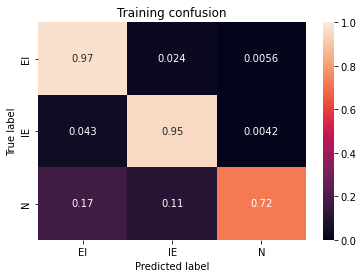

In [87]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
prediction5_train = knn5.predict(X=X_train)

cm = confusion_matrix(y_train, prediction5_train)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=knn5.classes_, title='Training confusion')

***Your answer goes here:***

### ========== Question 2.12 ==========
Read about the [logarithimic loss](http://scikit-learn.org/0.19/modules/generated/sklearn.metrics.log_loss.html) (or cross-entropy loss). It is often the error metric used when we are trying to optimise classification models.

This metric takes as input the true labels and the estimated probability distributions (bernouli or multinomial). It makes sense to use this metric when we are interested not only in the predicted labels, but also in the confidence with which these labels are predicted.

For instance, think of the situation where you have a single test point and two classifiers. Both classifiers predict the label correctly, however classifier A predicts that the test point belongs to the class with probability 0.55, whereas classifier B predicts the correct class with probability 0.99. Classification accuracy would be the same for the two classifiers (why?) but the `log_loss` metric would indicate that classifier B should be favoured.

Produce a scatter plot similar to the one in Question 2.10 but this time show `log_loss` on your y axis. Which value for `k` would you pick if `log_loss` was the error metric? Comment on why this might happen, and which metric would be a better evaluator of performance.

In [95]:
# Your Code goes here:
num = [5, 10, 50, 100, 200, 500, 1000, 1500, 2000]
losses = []

for i in range(len(num)):
    knn = KNeighborsClassifier(n_neighbors=num[i])
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X=X_test)
    print(y_pred)
    loss = log_loss(list(y_test), y_pred)
    losses.extend([loss])

losses

['IE' 'N' 'EI' 'N' 'IE' 'N' 'EI' 'EI' 'N' 'N' 'N' 'IE' 'N' 'EI' 'IE' 'EI'
 'EI' 'N' 'IE' 'N' 'EI' 'IE' 'IE' 'N' 'EI' 'EI' 'N' 'IE' 'EI' 'N' 'IE' 'N'
 'EI' 'N' 'N' 'N' 'N' 'IE' 'N' 'EI' 'N' 'IE' 'N' 'N' 'N' 'EI' 'EI' 'EI'
 'IE' 'EI' 'N' 'IE' 'IE' 'N' 'EI' 'N' 'N' 'IE' 'N' 'EI' 'EI' 'IE' 'IE' 'N'
 'N' 'EI' 'N' 'N' 'EI' 'N' 'IE' 'EI' 'EI' 'N' 'N' 'EI' 'IE' 'EI' 'N' 'N'
 'EI' 'EI' 'EI' 'EI' 'EI' 'EI' 'N' 'EI' 'EI' 'IE' 'N' 'IE' 'EI' 'N' 'IE'
 'EI' 'IE' 'N' 'IE' 'N' 'N' 'EI' 'EI' 'EI' 'EI' 'N' 'N' 'EI' 'EI' 'N' 'EI'
 'IE' 'N' 'EI' 'EI' 'N' 'EI' 'IE' 'IE' 'EI' 'EI' 'N' 'N' 'IE' 'EI' 'EI'
 'EI' 'IE' 'N' 'N' 'N' 'IE' 'N' 'EI' 'N' 'EI' 'EI' 'IE' 'IE' 'N' 'N' 'EI'
 'N' 'N' 'IE' 'IE' 'N' 'IE' 'EI' 'EI' 'IE' 'EI' 'N' 'IE' 'EI' 'N' 'N' 'IE'
 'IE' 'EI' 'EI' 'IE' 'EI' 'N' 'IE' 'EI' 'N' 'IE' 'IE' 'N' 'EI' 'IE' 'N'
 'N' 'N' 'EI' 'N' 'IE' 'N' 'N' 'IE' 'N' 'N' 'N' 'EI' 'N' 'N' 'N' 'EI' 'N'
 'EI' 'EI' 'IE' 'N' 'N' 'IE' 'N' 'EI' 'N' 'IE' 'EI' 'EI' 'EI' 'IE' 'IE'
 'IE' 'IE' 'N' 'IE' 'N' 'EI' 'N' 'N' 'EI' 'E

ValueError: could not convert string to float: 'IE'

***Your answer goes here:***

Classification accuracy would be the same for the two classifiers? Why?

### ========== Question 2.13 ==========

Could you use the `log_loss` metric to evaluate the performance of an SVM classifier? Explain.

***Your answer goes here:***